# SHAP Tutorial 
<br>
Applying and interpreting the Python SHAP Package 
<br>
Dataset: https://archive.ics.uci.edu/ml/datasets/Abalone

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from catboost import CatBoostRegressor

import shap
shap.initjs()

import sys
sys.path.append('../')
import utils

## Dataset

In [2]:
# Load dataset and add squared term
credit_score = pd.read_csv("../../data/credit_score.csv")

# Select features
features = ['INCOME','DEBT','R_EXPENDITURE','R_ENTERTAINMENT','CAT_GAMBLING']
X = credit_score[features].copy()

# Target variable
y = credit_score['CREDIT_SCORE']

## Model

In [4]:
model = CatBoostRegressor(iterations=100,
                           learning_rate=0.2,
                           depth=3)

# Train model
cat_features = ['CAT_GAMBLING']
model.fit(X, y, cat_features)

0:	learn: 59.6742748	total: 56.9ms	remaining: 5.63s
1:	learn: 55.9230416	total: 57.4ms	remaining: 2.81s
2:	learn: 53.1229050	total: 57.7ms	remaining: 1.86s
3:	learn: 51.3284729	total: 58ms	remaining: 1.39s
4:	learn: 49.9789382	total: 58.4ms	remaining: 1.11s
5:	learn: 48.3509981	total: 58.8ms	remaining: 921ms
6:	learn: 47.1180214	total: 59.1ms	remaining: 785ms
7:	learn: 46.1001746	total: 59.5ms	remaining: 684ms
8:	learn: 44.8525359	total: 59.7ms	remaining: 604ms
9:	learn: 43.4720043	total: 60.1ms	remaining: 541ms
10:	learn: 42.3261131	total: 60.4ms	remaining: 489ms
11:	learn: 41.4708006	total: 60.7ms	remaining: 445ms
12:	learn: 40.5321971	total: 61ms	remaining: 409ms
13:	learn: 39.7634224	total: 61.4ms	remaining: 377ms
14:	learn: 39.0863910	total: 61.8ms	remaining: 350ms
15:	learn: 38.3976004	total: 62.2ms	remaining: 326ms
16:	learn: 37.5594213	total: 62.5ms	remaining: 305ms
17:	learn: 36.9716718	total: 62.8ms	remaining: 286ms
18:	learn: 36.4867114	total: 63.1ms	remaining: 269ms
19:	lea

Text(0.5, 0, 'Actual')

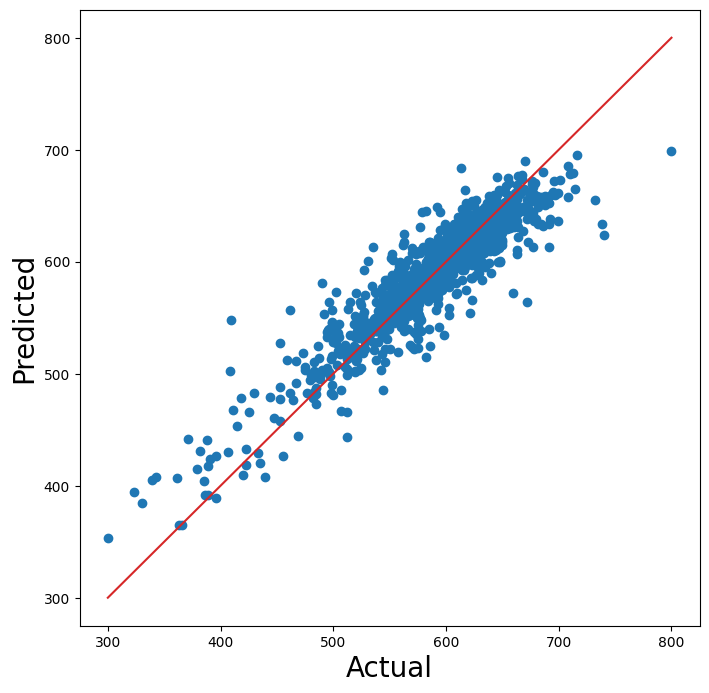

In [5]:
# Get predictions
y_pred = model.predict(X)

# Model evaluation
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(y,y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], color='tab:red')

plt.ylabel('Predicted',size=20)
plt.xlabel('Actual',size=20)

# SHAP

In [15]:
# Get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

print(np.shape(shap_values))

(1000, 5)


## Force Plot

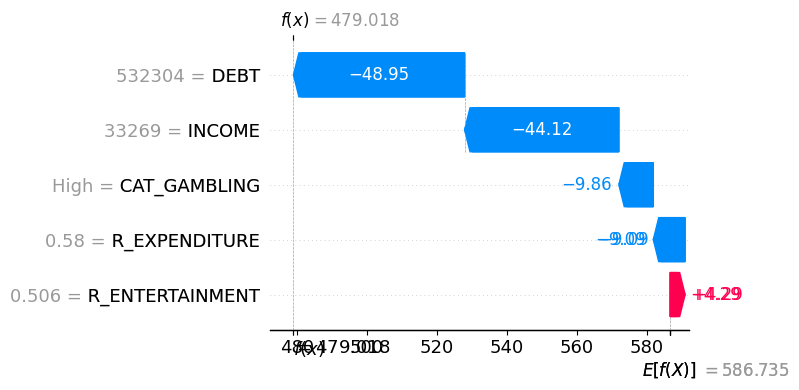

In [19]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

# Save figure
#utils.save_fig("MA5_waterfall_plot")

## Mean SHAP

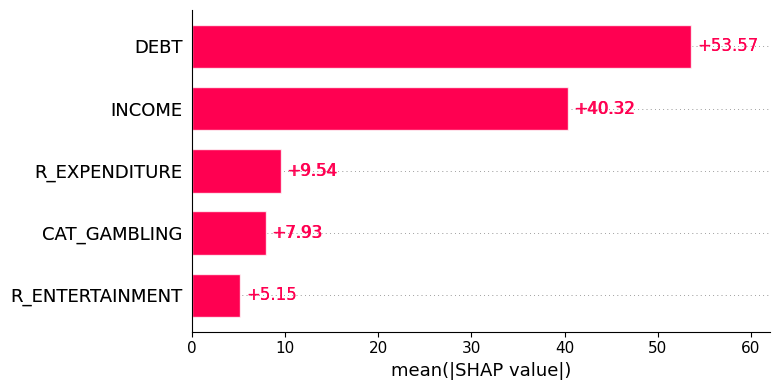

In [21]:
# Mean SHAP
shap.plots.bar(shap_values)

# Save figure
#utils.save_fig("MA5_mean_shap")

## Beeswarm

In [22]:
# Beeswarm plot
shap.plots.beeswarm(shap_values,show=False)

# Save figure
#utils.save_fig("MA5_beewarm_plot")